### Imports

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

In [2]:
from sklearn.datasets import make_moons, make_blobs, make_classification

In [3]:
# Imports for clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import completeness_score, silhouette_score
from sklearn.metrics import silhouette_samples

In [4]:
# Imports for data exploration / dimensionality reduction
from sklearn.decomposition import PCA, KernelPCA

In [5]:
# Libraries for pre-processing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

### Example 1: Clustering make_blobs

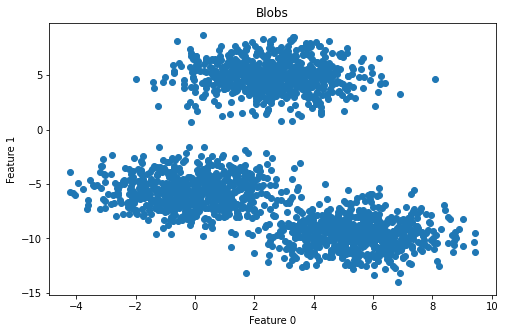

In [6]:
# Easy example with make_blobs
X_blobs, y_blobs = make_blobs(n_samples=2000, n_features=2, centers=None, cluster_std=1.5, center_box=(- 10.0, 10.0), shuffle=True, random_state=10, return_centers=False)

# Let's plot the blobs
plt.figure(figsize=(8,5))
plt.title("Blobs", fontsize=12)
#plt.grid(True)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('blobs_scatter_mono.pdf', dpi=300)
plt.show()

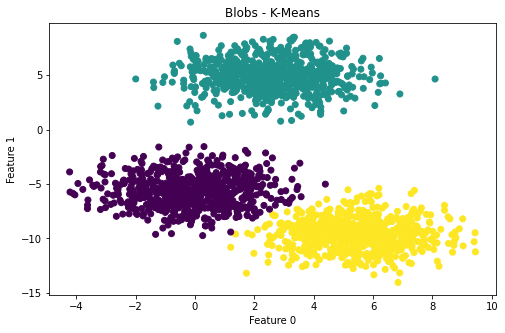

In [7]:
# K-Means
k = 3
kmeans_blobs = KMeans(n_clusters=k)
y_pred_blobs = kmeans_blobs.fit_predict(X_blobs)
# And plot them
plt.figure(figsize=(8,5))
plt.title("Blobs - K-Means", fontsize=12)
#plt.grid(True)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_blobs)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('pred_blobs_scatter.pdf', dpi=300)
plt.show()

In [8]:
# Completeness score
print("Completeness score=%.3f" % completeness_score(y_blobs, y_pred_blobs))
# Silhouette score
print("Silhouette score=%.3f" % silhouette_score(X_blobs, y_pred_blobs))

Completeness score=0.967
Silhouette score=0.664


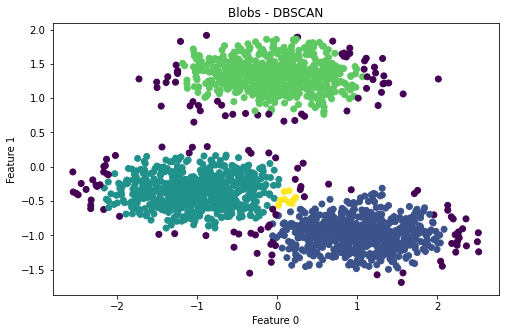

In [9]:
# DBSCAN
X_blobs_std = StandardScaler().fit_transform(X_blobs)
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X_blobs_std)
# And plot them
plt.figure(figsize=(8,5))
plt.title("Blobs - DBSCAN", fontsize=12)
#plt.grid(True)
plt.scatter(X_blobs_std[:, 0], X_blobs_std[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('dbscan_pred_blobs_scatter.pdf', dpi=300)
plt.show()

### Example 2: Clustering make_moons

In [10]:
X, y = make_moons(n_samples=2000, noise=0.05)
X.shape

(2000, 2)

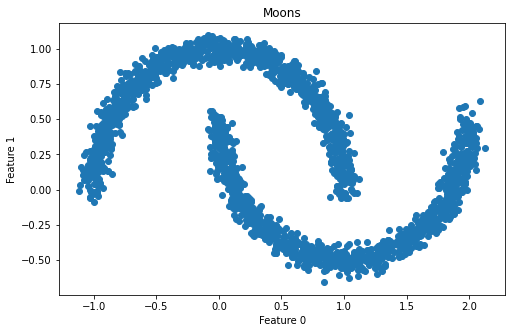

In [11]:
plt.figure(figsize=(8,5))
plt.title("Moons", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('moons_scatter_mono.pdf', dpi=300)
plt.show()

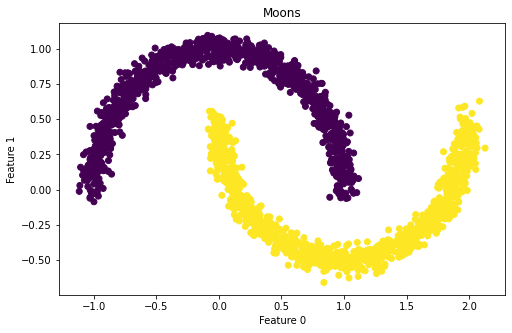

In [12]:
plt.figure(figsize=(8,5))
plt.title("Moons", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('moons_scatter_colour.pdf', dpi=300)
plt.show()

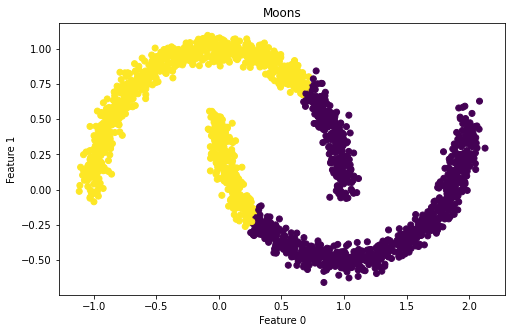

Completeness score=0.191
Silhouette score=0.491


In [13]:
# Let's try kmeans
k = 2

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
# Let's plot the first 2 features (which are the informative ones)
plt.figure(figsize=(8,5))
plt.title("Moons", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('pred_moons_scatter_colour_k2.pdf', dpi=300)
plt.show()
# Completeness score
print("Completeness score=%.3f" % completeness_score(y, y_pred))
# Silhouette score
print("Silhouette score=%.3f" % silhouette_score(X, y_pred))

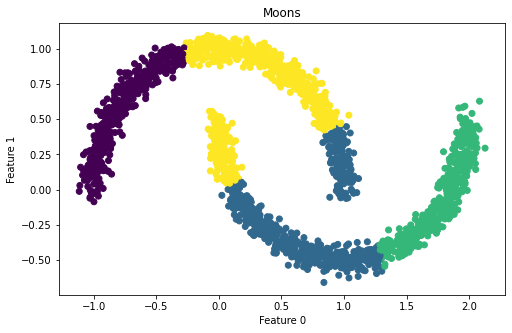

Completeness score=0.265
Silhouette score=0.458


In [14]:
# Let's try kmeans
k = 4

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
# Let's plot the first 2 features (which are the informative ones)
plt.figure(figsize=(8,5))
plt.title("Moons", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('pred_moons_scatter_colour_k4.pdf', dpi=300)
plt.show()
# Completeness score
print("Completeness score=%.3f" % completeness_score(y, y_pred))
# Silhouette score
print("Silhouette score=%.3f" % silhouette_score(X, y_pred))

In [15]:
inertias, sil = [], []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(X, y_pred))


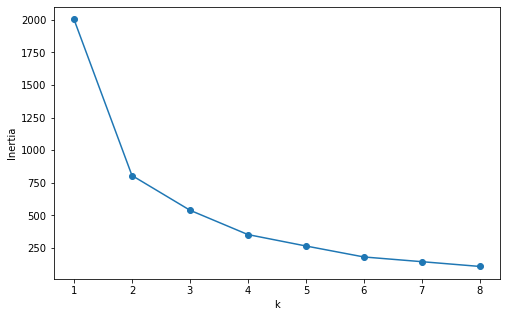

In [16]:
# Let's plot inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.savefig('elbow_moons.pdf', dpi=300)
plt.show()

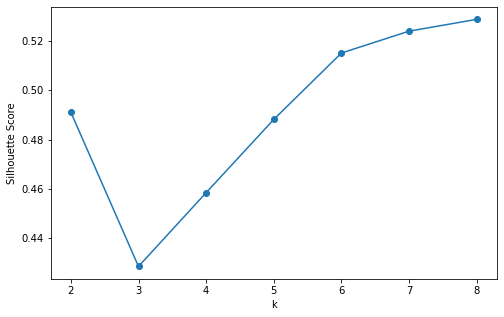

In [17]:
# Let's plot Silhouette Score vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.savefig('elbow_moons_sil.pdf', dpi=300)
plt.show()

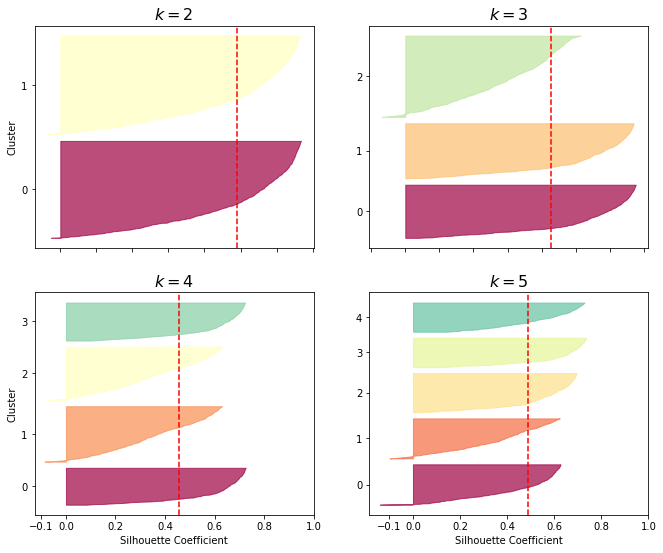

In [18]:
plt.figure(figsize=(11, 9))

for k in range(2, 6):
    plt.subplot(2, 2, k - 1)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X, y_pred), color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("silhouette_analysis_diagram_moons.pdf", dpi=300)
plt.show()

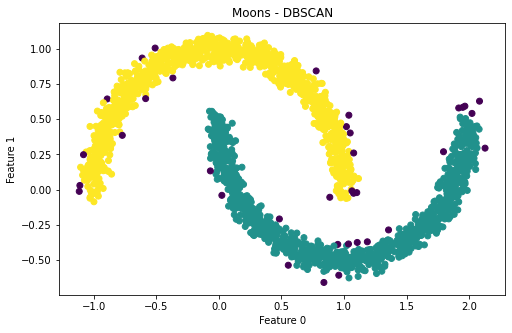

In [19]:
# DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
# And plot them
plt.figure(figsize=(8,5))
plt.title("Moons - DBSCAN", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('dbscan_pred_moons_v1.pdf', dpi=300)
plt.show()

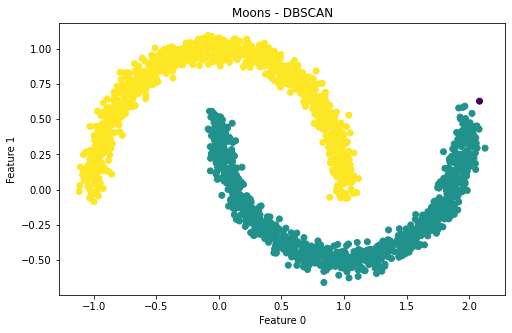

In [20]:
# DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
# And plot them
plt.figure(figsize=(8,5))
plt.title("Moons - DBSCAN", fontsize=12)
#plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('Feature 1')
plt.savefig('dbscan_pred_moons_v2.pdf', dpi=300)
plt.show()

### Case study: Student performance

In [21]:
students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
students['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [23]:
students['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [24]:
students['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [25]:
# Some data manipulation/cleaning
num_features = ['math score', 'reading score', 'writing score']
ord_features = ['parental level of education', 'gender', 'lunch', 'test preparation course']
cat_features = ['race/ethnicity']

colTransformer = ColumnTransformer([('num', StandardScaler(), num_features),
                                    ('cat', OneHotEncoder(), cat_features),
                                    ('ord', OrdinalEncoder(), ord_features)
                                    ],
                                   remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
                                  )
X_processed = colTransformer.fit_transform(students)
X_processed.shape


(1000, 12)

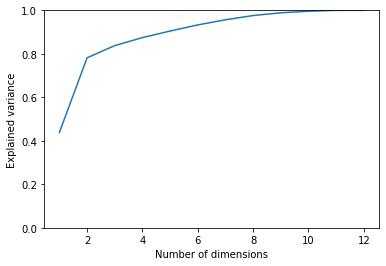

In [26]:
# If we don't specify variance, we can do an elbow plot:
pca_n = PCA()
students_pca_n = pca_n.fit_transform(X_processed)
c = np.cumsum(pca_n.explained_variance_ratio_)
plt.plot(range(1, len(c)+1), c)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained variance")
plt.ylim(0, 1)
plt.savefig('students_pca_variance.pdf', dpi=300)
plt.show()

In [27]:
# Choose number of components based on explained variance:
pca_n = PCA(n_components=0.95)
students_pca_n = pca_n.fit_transform(X_processed)
np.cumsum(pca_n.explained_variance_ratio_)  # we are keeping 7 components

array([0.43860437, 0.78178965, 0.83787519, 0.87469327, 0.90485307,
       0.93302616, 0.95666516])

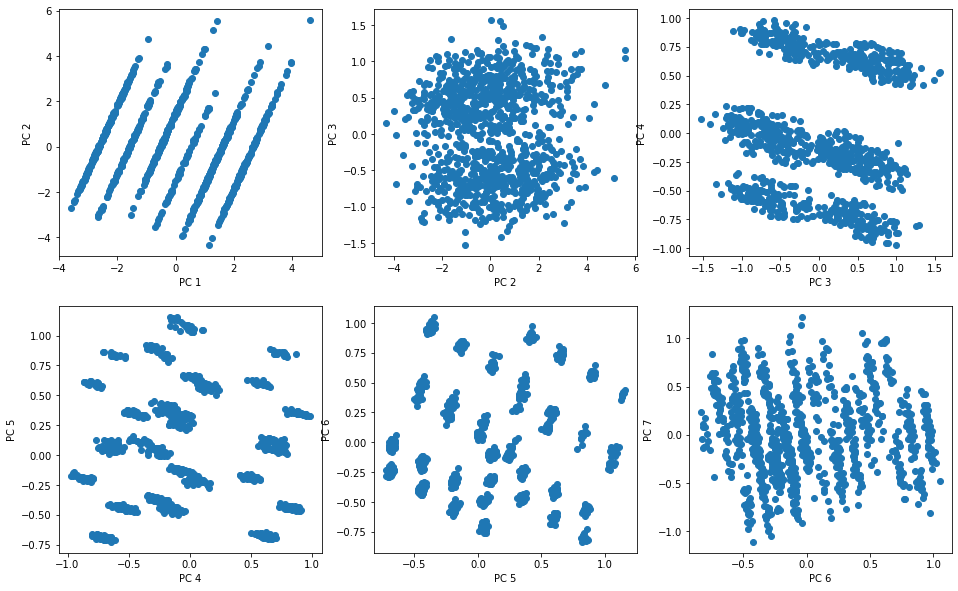

In [28]:
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(students_pca_n[:, i-1], students_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()

In [29]:
# What do these components represent?
# First let's see the names for each column after the columnTransformer
cat_encoder = colTransformer.named_transformers_['cat']  # the OHO features
cat_oho_attributes = [item for sublist in cat_encoder.categories_ for item in sublist]
feats = num_features + cat_oho_attributes + ord_features
print(len(feats), feats)
assert len(feats) == X_processed.shape[1]  # check number of columns is the same

12 ['math score', 'reading score', 'writing score', 'group A', 'group B', 'group C', 'group D', 'group E', 'parental level of education', 'gender', 'lunch', 'test preparation course']


(7, 12)


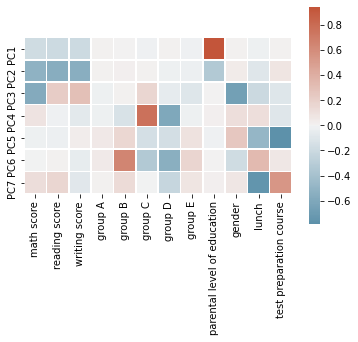

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,featName
0,-0.181138,-0.517394,-0.577557,0.086842,-0.018933,-0.001609,0.123659,math score
1,-0.193146,-0.551510,0.223678,-0.007600,-0.027778,0.015011,0.169403,reading score
2,-0.198610,-0.547821,0.295054,-0.068017,0.034033,-0.044643,-0.081248,writing score
3,0.012813,0.014496,-0.023719,-0.019857,0.051982,0.049141,0.016495,group A
4,0.005099,0.018830,0.016030,-0.127718,0.156166,0.647952,0.135095,group B
5,-0.011822,0.015174,0.167768,0.761273,-0.147813,-0.330046,-0.000085,group C
6,0.011108,-0.022907,-0.057700,-0.595822,-0.153097,-0.541101,-0.225924,group D
7,-0.017198,-0.025594,-0.102380,-0.017875,0.092762,0.174054,0.074419,group E
8,0.942776,-0.331976,0.003926,0.020633,-0.004052,0.003672,0.017284,parental level of education
9,0.012604,0.043061,-0.660037,0.116083,0.253358,-0.173376,0.069735,gender


In [30]:
# Now we can check PCA's mixing matrix
print(pca_n.components_.shape)
# How are the PCs?
dfPCA = pd.DataFrame(data=pca_n.components_.T, columns=['PC%d' % i for i in range(1, pca_n.components_.shape[0]+1)])
dfPCA['featName'] = feats
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfPCA.iloc[:, :-1].T, center=0, square=True, linewidths=.5, 
            #cbar_kws={"shrink": .5}, 
            cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.xticks(np.asarray(range(len(feats)))+0.5, feats, rotation=90)
plt.savefig('students_pca_component_matrix.pdf', dpi=300)
plt.show()
dfPCA#.head()


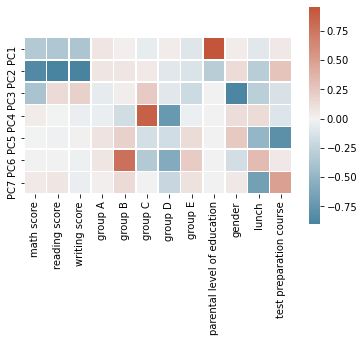

In [31]:
# We can also look at the correlations between the components and the original features
data = np.hstack((students_pca_n, X_processed))
df_corr = pd.DataFrame(data=data, columns=['PC%d' % i for i in range(1, pca_n.components_.shape[0]+1)]+feats)
sns.heatmap(df_corr.corr().iloc[:students_pca_n.shape[1], students_pca_n.shape[1]:], 
            center=0, square=True, linewidths=.5,
           cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.savefig('students_pca_correlations.pdf', dpi=300)
plt.show()

2


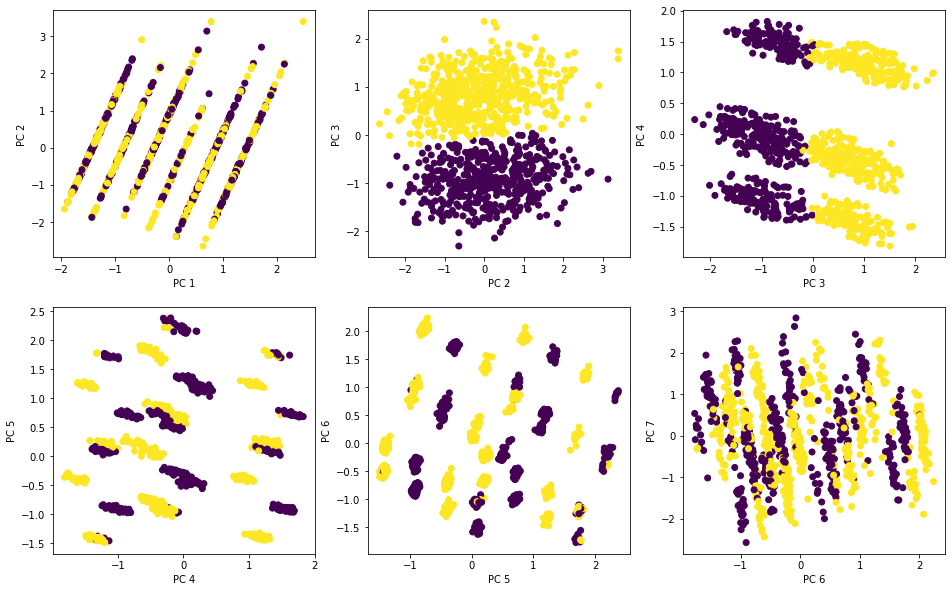

In [32]:
# Let's try to cluster
X_std = StandardScaler().fit_transform(students_pca_n)
clusterer = KMeans(n_clusters=2)
clusterer.fit(X_std[:, 1:3])
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(X_std[:, i-1], X_std[:, i], c=clusterer.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()

8


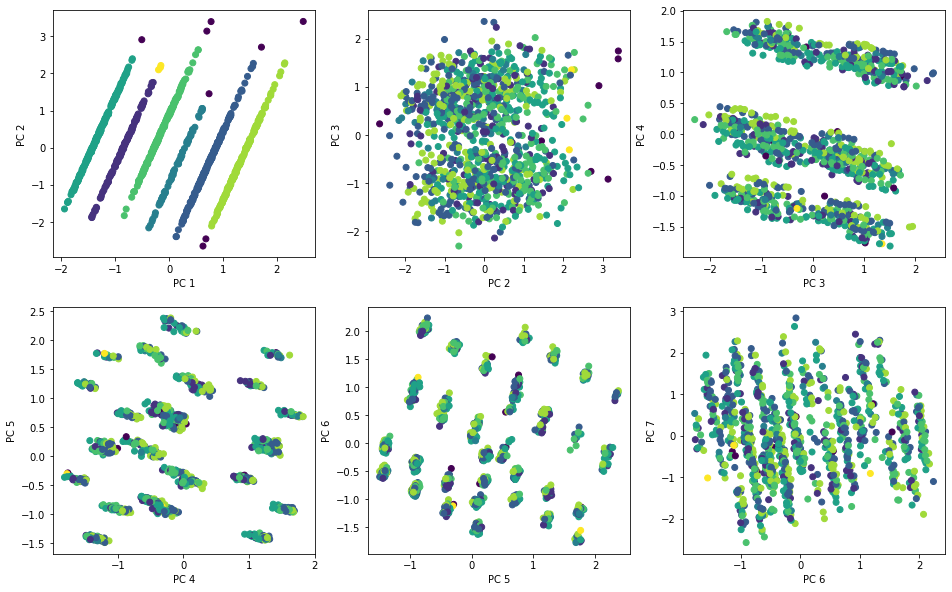

In [33]:
# Shall we cluster?
X_std = StandardScaler().fit_transform(students_pca_n)
clusterer = DBSCAN(eps=0.35, min_samples=3)
clusterer.fit(X_std[:, :2])
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16,10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.scatter(X_std[:, i-1], X_std[:, i], c=clusterer.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_dbscan.pdf', dpi=300)
plt.show()

In [ ]:
X, y = make_classification(n_samples=2000, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=2, weights=None, flip_y=0, class_sep=1.0, hypercube=True, 
                           shift=0.0, scale=None, shuffle=False, random_state=12)
# if shuffle == False, all relevant features are in X[:, :n_informative + n_redundant + n_repeated]